imports

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from math import sin
import numpy as np

# Task 0

In [2]:
def foo (v1, v2):
    return 2*v1*v2/(v1+v2)

In [3]:
v1 = random.randint(0, 100)
v2 = random.randint(0, 100)
print(foo(v1, v2))

23.958333333333332


# Task 1 - datasets generation

In [ ]:
def draw(df_linear):    
    uper_df = df_linear[(df_linear["res"] == 1)]
    x = uper_df["v1"]
    y = uper_df["v2"]
    labels = uper_df["res"]
    plt.plot(x, y, ".")

    lower_df = df_linear[(df_linear["res"] == -1)]
    x = lower_df["v1"]
    y = lower_df["v2"]
    labels = lower_df["res"]
    plt.plot(x, y, "^")

    plt.show()

## Logistic Regression

In [4]:
def foo_to_clasify_logistic(x, y):
    if sin((x/5 -1))>y/5 -1:
        return -1
    elif sin((x/5 -1)) < y/5 -1:
        return 1
    else:
        return random.choice([-1, 1])

In [18]:
dataset_train = []
dataset_test = []
size_train = 8000
for _ in range(size_train):
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    dataset_train.append([x, y, foo_to_clasify_logistic(x, y)])
    
size_test = 2000
for _ in range(size_test):
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    dataset_test.append([x, y, foo_to_clasify_logistic(x, y)])
    
df_logistic_train = pd.DataFrame(dataset_train, columns=["v1", "v2", "res"])
df_logistic_train.to_csv("classification_dataframe.csv")

df_logistic_test = pd.DataFrame(dataset_test, columns=["v1", "v2", "res"])
df_logistic_test.to_csv("classification_dataframe_test.csv")

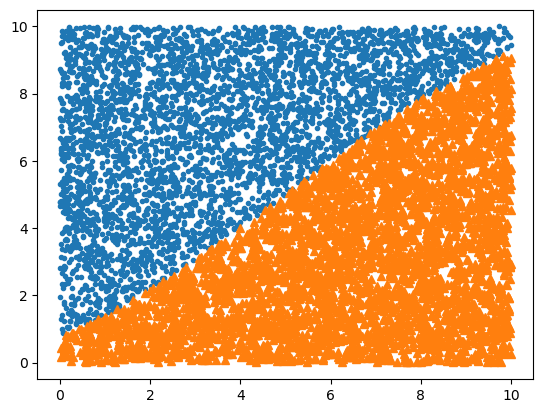

In [19]:
df_logistic_train = pd.read_csv('classification_dataframe.csv')
df_logistic_test = pd.read_csv("classification_dataframe_test.csv")
draw(df_logistic_train)

## Training models

In [21]:
X_train = df_logistic_train.drop(["res", "Unnamed: 0"], axis=1)
y_train = df_logistic_train["res"]
X_test = df_logistic_test.drop(["res", "Unnamed: 0"], axis=1)
y_test = df_logistic_test["res"]

In [22]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression

reg_ridge = Ridge(random_state=0)
reg_ridge.fit(X_train.values, y_train.values)

reg_lasso = Lasso(random_state=0)
reg_lasso.fit(X_train.values, y_train.values)

lin = LinearRegression().fit(X_train.values, y_train.values)

clf = LogisticRegression(random_state=0).fit(X_train.values, y_train.values)

## Model validation
linear


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_lin = [-1 if i<0 else 1 for i in lin.predict(X_test.values)]
print("linear", f1_score(y_test.values, y_pred_lin))

linear 0.9723046488625123


In [39]:
y_pred_log = [-1 if i<0 else 1 for i in clf.predict(X_test.values)]
print("logistic", f1_score(y_test.values, y_pred_log))

logistic 0.9890873015873016


In [40]:
y_pred_rid = [-1 if i<0 else 1 for i in reg_ridge.predict(X_test.values)]
print("linear with ridge regularisation", f1_score(y_test.values, y_pred_rid))

linear with ridge regularisation 0.9723046488625123


In [41]:
y_pred_las = [-1 if i<0 else 1 for i in reg_lasso.predict(X_test.values)]
print("linear with lasso regularisation", f1_score(y_test.values, y_pred_las))

linear with lasso regularisation 0.9177744953225012


# Task 2

In [58]:
def foo_to_predict(x, sigma):
    foo = lambda x: 10*(((0.2*x-0.9)**5) - ((0.2*x-0.9)**3)  + ((0.2*x - 0.9)**2))
    return random.choice(np.random.normal(foo(x), sigma, 100))

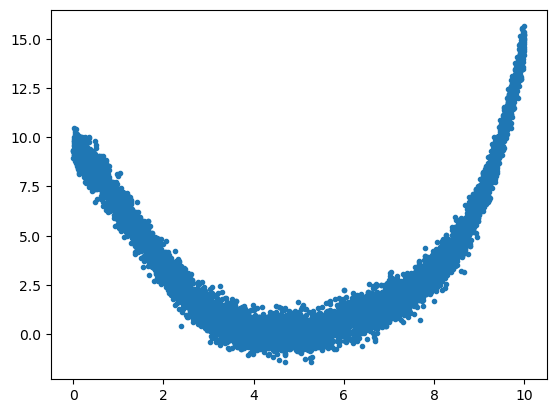

In [67]:
dataset_train = []
dataset_test = []
dataset_validation = []
size_train = 8000
for _ in range(size_train):
    x = random.uniform(0, 10)
    dataset_train.append([x, foo_to_predict(x,0.5)])
    
size_test = 2000
for _ in range(size_test):
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    dataset_test.append([x, foo_to_predict(x,0.5)])

    
df_logistic_train = pd.DataFrame(dataset_train, columns=["v1", "v2"])
df_logistic_train.to_csv("prediction_dataframe.csv")

df_logistic_test = pd.DataFrame(dataset_test, columns=["v1", "v2"])
df_logistic_test.to_csv("prediction_dataframe_test.csv")


x = df_logistic_train["v1"]
y = df_logistic_train["v2"]
plt.plot(x, y, ".")
plt.show()

In [69]:
df_logistic_train = pd.read_csv('prediction_dataframe.csv')
df_logistic_test = pd.read_csv("prediction_dataframe_test.csv")

In [95]:
X_train = df_logistic_train["v1"].values
y_train = df_logistic_train["v2"].values
X_test = df_logistic_test["v1"].values
y_test = df_logistic_test["v2"].values

In [ ]:
from numpy.polynomial import polynomial as P

p_train = [] 
for i in range(0,31):
    p_train.append(P.polyfit(X_train,y_train,i))

In [ ]:
from numpy.polynomial import polynomial as P

yfit_train = []
mse_train =[]

for i in range(0,31):
    #y values of the polynomials evaluated at the input points x_train.
    yfit_train.append(P.polyval(X_train,p_train[i])) 
    #mean of squared differences between the datapoints y and the fitted y-values
    mse_train.append(mean_squared_error(y_train,yfit_train[i]))

#display overview about mse's
plt.bar(range(0,31),mse_train, label = 'mse based on training set') # Artificial Datapoints
plt.title('Accuracy against complexity of model (training data set)')
plt.xlabel('Order of fitted polynomial function')
plt.ylabel('Mean squared error')
plt.show()

In [ ]:
yfit_test = []
mse_test =[]

for i in range(0,31):
    #y values of the polynomials evaluated at the input points x_test.
    yfit_test.append(P.polyval(X_test,p_train[i])) 
    #mean of squared differences between the datapoints y and the fitted y-values
    mse_test.append(mean_squared_error(y_test,yfit_test[i]))

#display overview about mse's
plt.bar(range(0,31),mse_test, label = 'mse based on test set') # Artificial Datapoints
plt.title('Accuracy against complexity of model (test data set)')
plt.xlabel('Order of fitted polynomial function')
plt.ylabel('Mean squared error')
plt.ylim(top=100)
plt.show()

## Another Function

In [109]:
grid = np.linspace(-20,20,101) 
#artificial input values x match the grid
x = np.linspace(-20,20,101) 
#artifical output values y: polynomial of degree 5 plus a random error term (normally distributed with mean 0 and standard deviation 2, using a fixed seed for reproducible results)
#So the best estimator for y should be a polynom of degree 5
np.random.seed(111)
y = 0.000005*x**5 + 2*np.random.randn(len(x))

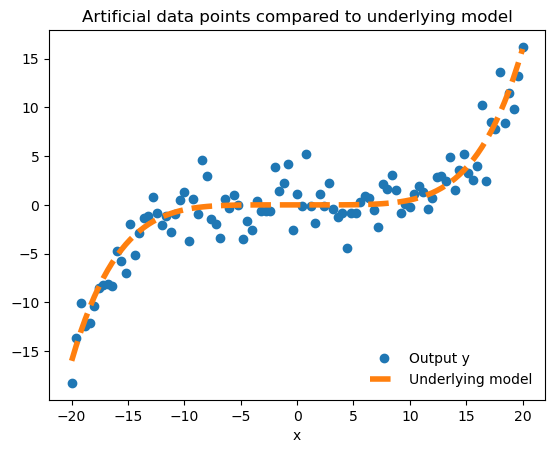

In [110]:
plt.style.use('default')
plt.plot(x,y,'o', label = 'Output y') # Artificial Datapoints
plt.plot(x,0.000005*x**5,'--',lw=4, label = 'Underlying model') #'Real' underlying model
plt.title('Artificial data points compared to underlying model')
plt.xlabel('x')
plt.legend(loc ='lower right',frameon=False)
plt.show()

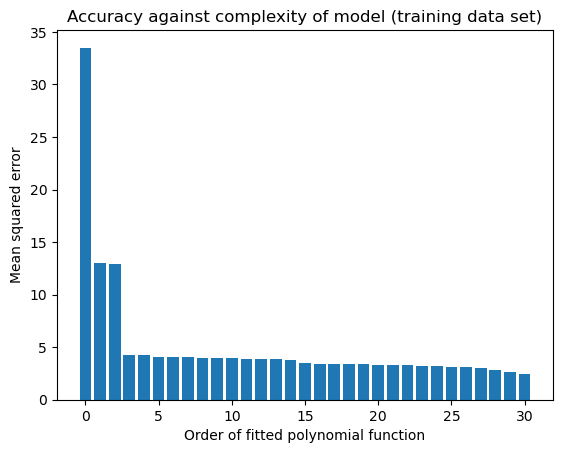

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4)
from numpy.polynomial import polynomial as P

p_train = [] 
for i in range(0,31):
    p_train.append(P.polyfit(x_train,y_train,i))

    from numpy.polynomial import polynomial as P

yfit_train = []
mse_train =[]

for i in range(0,31):
    #y values of the polynomials evaluated at the input points x_train.
    yfit_train.append(P.polyval(x_train,p_train[i])) 
    #mean of squared differences between the datapoints y and the fitted y-values
    mse_train.append(mean_squared_error(y_train,yfit_train[i]))

#display overview about mse's
plt.bar(range(0,31),mse_train, label = 'mse based on training set') # Artificial Datapoints
plt.title('Accuracy against complexity of model (training data set)')
plt.xlabel('Order of fitted polynomial function')
plt.ylabel('Mean squared error')
plt.show()

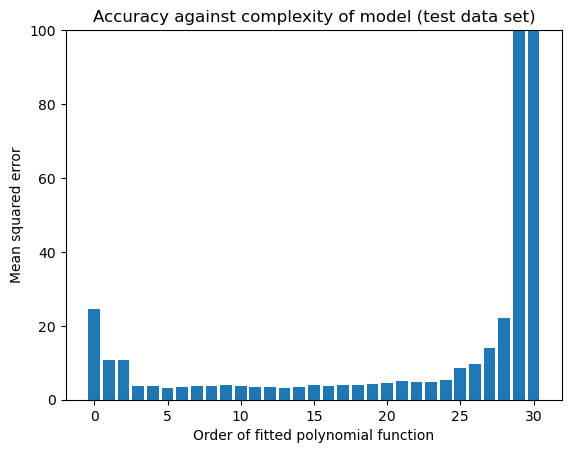

In [114]:
yfit_test = []
mse_test =[]

for i in range(0,31):
    #y values of the polynomials evaluated at the input points x_test.
    yfit_test.append(P.polyval(x_test,p_train[i])) 
    #mean of squared differences between the datapoints y and the fitted y-values
    mse_test.append(mean_squared_error(y_test,yfit_test[i]))

#display overview about mse's
plt.bar(range(0,31),mse_test, label = 'mse based on test set') # Artificial Datapoints
plt.title('Accuracy against complexity of model (test data set)')
plt.xlabel('Order of fitted polynomial function')
plt.ylabel('Mean squared error')
plt.ylim(top=100)
plt.show()

## Task 3